#### Paper data and plots

This notebook plots the data presented in the paper 'Compare the Pair: Rotated vs. Unrotated Surface Codes at Equal Logical Error Rates' by importing the already-collected data and plotting it. For an example of how to generate this data before plotting it see 'example.ipynb'.

##### Choose Noise Model

In [32]:
# CHOOSE NOISE MODEL:

noise_model = 'SD' # choices are SD and SI

## THEN RUN ALL CELLS

##### Requirements

In [33]:
import sinter
import stim

import os
import sys
import pickle

sys.path.insert(0, 'functions') 
import morefuncs as morefuncs
import com_funcs5 as funcs

# Update with any changes to these files:
from importlib import reload
reload(morefuncs)
reload(funcs);

##### Import the collected data:

In [34]:
# Import from the pickled data (faster)
with open(f'collected_stats/pickled_stats/{noise_model}_stats.pickle', 'rb') as file:
        mylist = pickle.load(file)

## Import from the csv files (slower)
# mylist = sinter.stats_from_csv_files(f'collected_stats/{noise_model}_stats.csv')

## Pickle:
# path = f'collected_stats/pickled_stats/{noise_model}_stats.pickle'
# with open(path,"wb") as file:
        # pickle.dump(mylist,file)

In [35]:
# # bin the CNOT orders to decide which ones to plot:
roorders, unroorders = funcs.bin_CNOT_orders(mylist) # print out CNOT orders 

Rotated code CNOT orders:
10231203

Unrotated code CNOT orders:
10231203


##### Threshold plots: $p_L$ vs. $p$

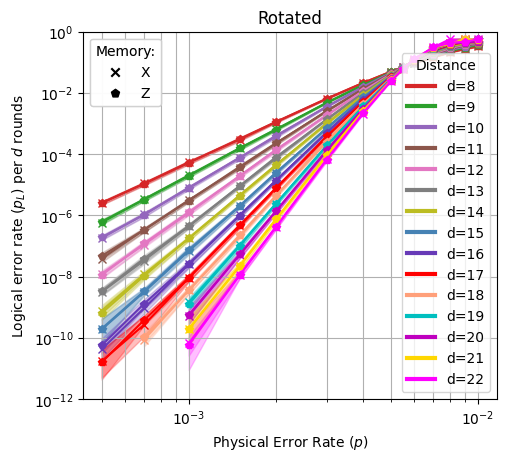

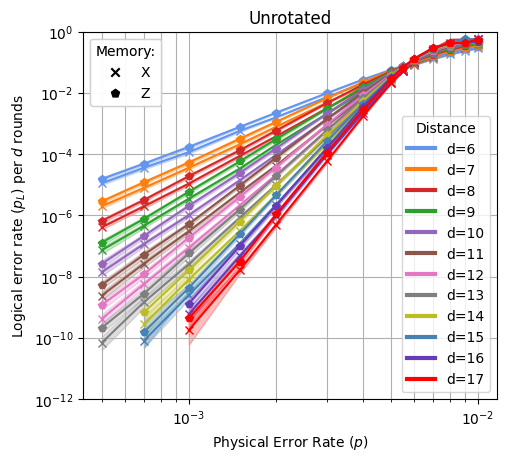

In [36]:
reload(funcs)

# Decide what CNOT orders to plot:
roorder = roorders[0] 
unroorder = unroorders[0]

#Plot:
funcs.plot_thresholds(mylist, roorder, unroorder, romind = 8, unromind = 6,ylims = [1e-12, 1])

##### Find $p_\text{th}$ using near-threshold scaling: $p_L = A + B (p - p_{\text{th}}) d^{\frac{1}{v}} + C (p - p_{\text{th}})^2 d^{\frac{2}{v}}$

Find threshold using fit to a universal scaling function ([arxiv.org/1311.5003](https://arxiv.org/abs/1311.5003)) aka critical scaling ansatz ([arXiv:2101.04125v3](https://arxiv.org/abs/2101.04125v3)):



distances = combined

ro z 10231203

p_th = 0.005637 ± 0.000004
v = 1.091675 ± 0.033001

unro z 10231203

p_th = 0.005652 ± 0.000003
v = 1.049292 ± 0.031163


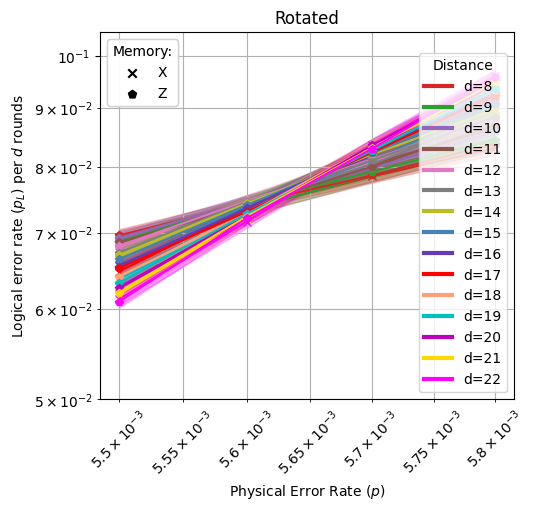

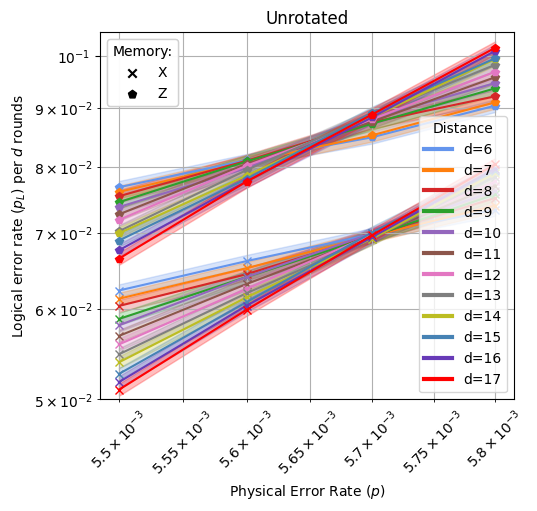

In [37]:
reload(funcs)

# Choose CNOT orders:
roorder = roorders[0] 
unroorder = 10231203 

# Choose basis for fitting threshold to (though plots will display both):
b = 'z' # choices are x or z. Mem. z is worst-case for unrotated codes with inner CNOTs 0 and 2, e.g. unroorder 12031023.

# Choose whether to just do odd distances, even distances or both:
distances = 'combined' # choices are 'odd', 'even' or 'combined'


# The function which fits to the near-threshold scaling function and plots the data:
funcs.fit_threshold_scaling_and_plot(
    mylist, 
    distances,
    b,
    roorder,
    unroorder,
    minp = 0.0055 if noise_model == 'SD' else 0.0049, maxp = 0.0058 if noise_model == 'SD' else 0.0052, 
    romind = 8, 
    unromind = 6, 
    ylims = [5e-2, 1.05e-1] if noise_model == 'SD' else [3e-2, 8e-2], 
    optional_plot = True)


##### Fit to scaling function $p_L = \alpha ( p / \beta)^{\gamma d + \delta}$

distances =  combined

ro z 10231203

    α = 0.078 ± 0.008
    β = 0.00529 ± 0.00003
    γ = 0.578 ± 0.006
    δ = 0.28 ± 0.09


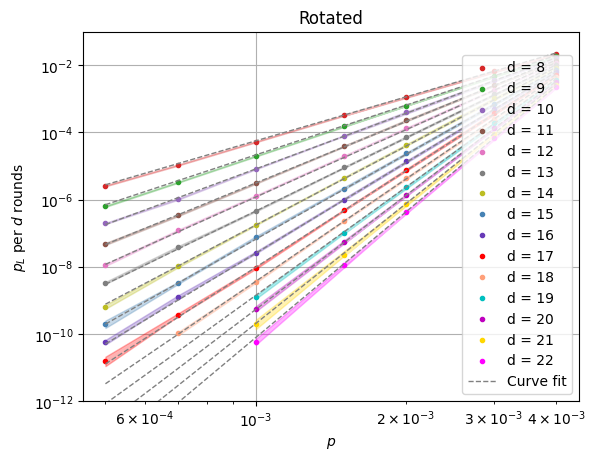


unro z 10231203

    α = 0.081 ± 0.007
    β = 0.00539 ± 0.00002
    γ = 0.706 ± 0.010
    δ = 0.70 ± 0.11


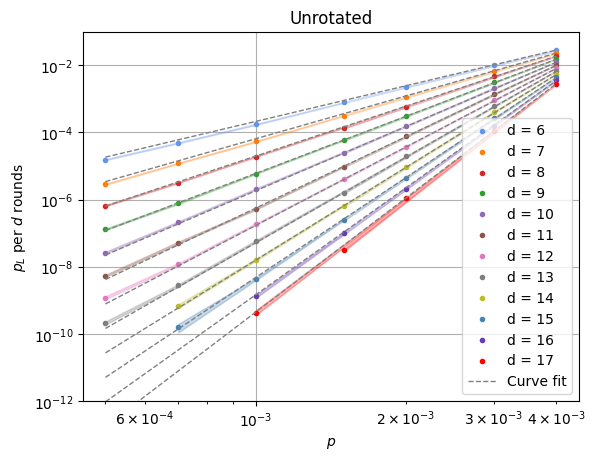

In [38]:
reload(funcs)

b = 'z' # choices are x or z. Memory z is worst-case for unrotated codes (with inner CNOTs 0 and 2, e.g. unroorder 12031023.)

distances = 'combined' # choices are 'odd', 'even' or 'combined'

# for distances in ['odd','even','combined']:

print("distances = ",distances)
funcs.fit_scaling_and_plot(mylist, distances, b, roorder, unroorder,minp = 5e-4, maxp = 0.004, romind = 8, unromind = 6, romaxd = 22, unromaxd = 17, optional_plot = True, ylims = [1e-12, 1e-1])


##### Plot as $p_L$ vs. $\sqrt{n}$

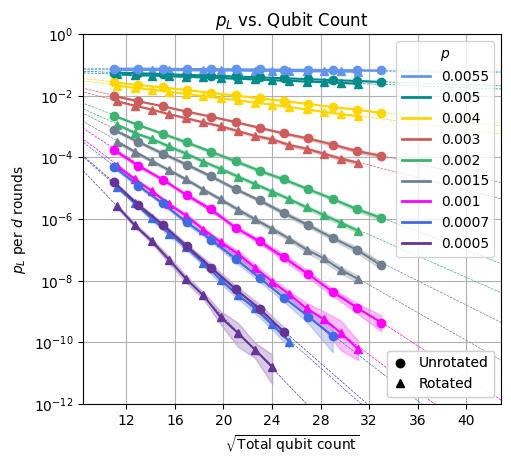

In [39]:
reload(funcs)

b = 'z' 

# give pvalues that have been simulated for these orders:
pvalues = funcs.give_p_values(mylist, roorder, unroorder)

funcs.plot_pL_vs_qubit_count(mylist, b, roorder, unroorder, ps = [5e-4, 7e-4, 1e-3,1.5e-3,2e-3, 3e-3, 4e-3, 5e-3, 5.5e-3], romind = 8, unromind = 6)

##### Plot ratios of qubit counts vs. $p_L$

This is the projected number of qubits used by the rotated surface code divided by the number of qubits used by the unrotated surface code to achieve the same $p_L$

p = 0.001
At pL = 9.549e-13:
ratio = 0.7435 ± 0.01667
At pL = 1.047e-12:
ratio = 0.7435 ± 0.01668


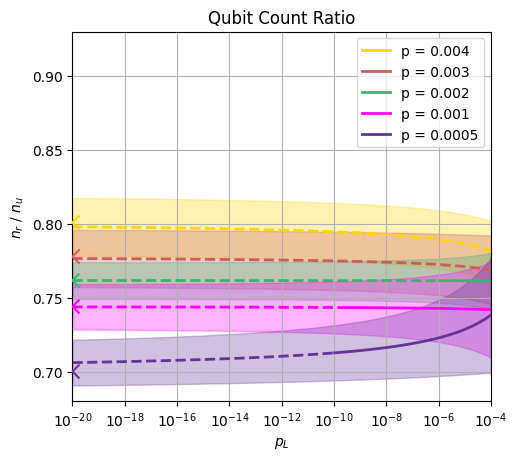

In [40]:
reload(funcs)

b = 'z' 

plot_pvalues = [0.0005, 0.001, 0.002, 0.003, 0.004]

funcs.plot_ratio(mylist, b, roorder, unroorder, romind = 8, unromind = 6, ps = plot_pvalues, paper_ylims = True)

##### Plot 'teraquop' count :$\ $ the number of qubits required to reach $p_L = 10^{-12}$

<IPython.core.display.Math object>

When p = 0.001:
q = 1879.67 ± 33.09
q = 1397.52 ± 19.42

Ratio = 0.7435


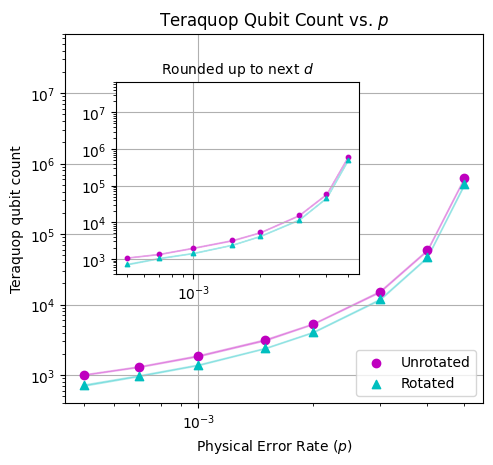

In [41]:
reload(funcs)

b = 'z' 
ps = [5e-4, 7e-4, 1e-3, 1.5e-3, 2e-3, 3e-3, 4e-3, 5e-3]

funcs.plot_teraquop(mylist, b, roorder, unroorder, ps = ps, teraquop_inset = True, romind = 8, unromind = 6, optional_plot = False, ylims = [4e2,7e7])  # make sure selection of pvalues is below threshold

##### Memory time vs. $\sqrt{n}$

This is a reformulation of the $p_L$ vs. $\sqrt{n}$ plots above, converting the $p_L$ per $d$ rounds to be the length of time (assuming one stabiliser measurement cycle take a microsecond) before $p_L$ over the entire shot of the memory experiment equals $p$.

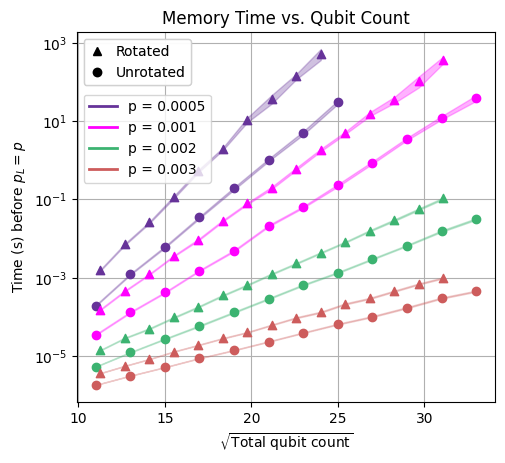

In [42]:
reload(funcs)

b = 'z'

funcs.plot_memory_times(mylist, b, roorder, unroorder, ps = [0.0005, 0.001, 0.002, 0.003], romind = 8, unromind = 6, plotagainst = 'rtqubits') # choices for plotagainst are rtqubits, qubits or distance